In [3]:
%pip install matplotlib scikit-learn sklearn 
%pip install seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: xlabel='age', ylabel='chol'>

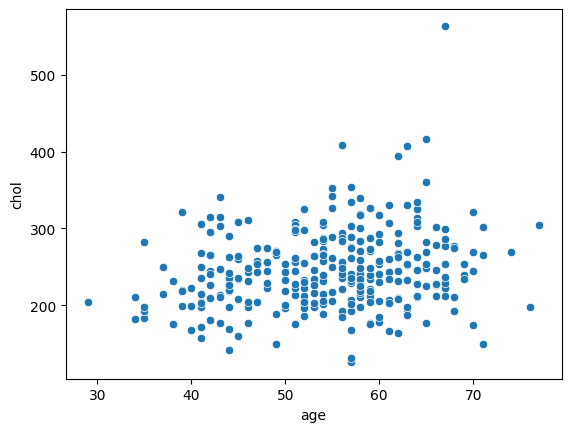

In [5]:
sns.scatterplot(x='age', y='chol',data = df)

<Axes: xlabel='cp', ylabel='age'>

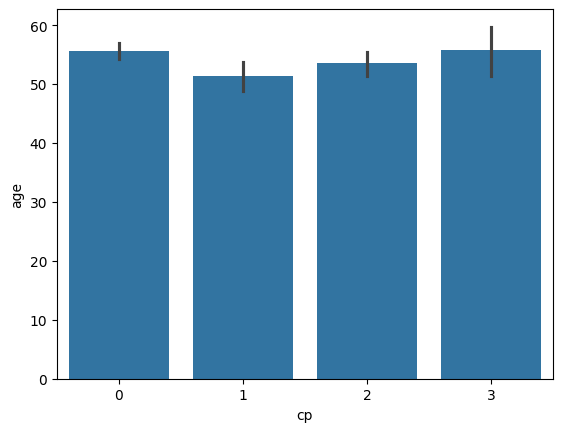

In [6]:
sns.barplot(x='cp',y='age',data=df)

<Axes: xlabel='output', ylabel='cp'>

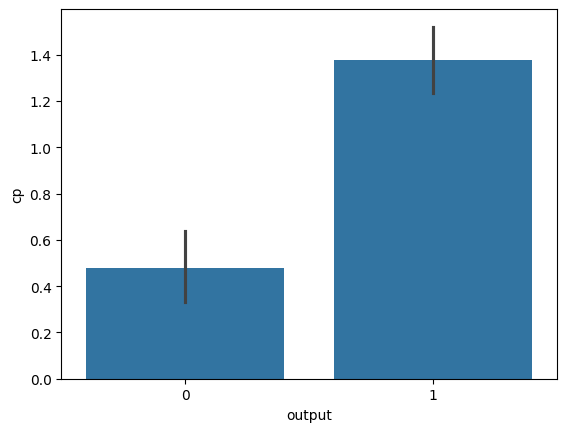

In [7]:
sns.barplot(x='output', y='cp', data=df)

<Axes: xlabel='output', ylabel='sex'>

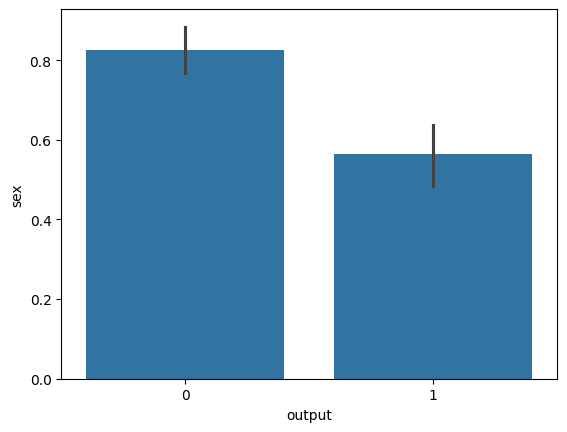

In [9]:
sns.barplot(x='output', y = 'sex', data=df)

In [10]:
x=df.drop(['output'], axis=1)
y=df['output']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [13]:
sc = StandardScaler()

In [15]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Logistic regression

In [16]:
lr = LogisticRegression()

In [18]:
lr.fit(x_train, y_train)

LogisticRegression()

In [19]:
lr.score(x_test, y_test)

0.8852459016393442

In [20]:
y_pred = lr.predict(x_test)

In [26]:
c = confusion_matrix(y_test,y_pred)

<Axes: >

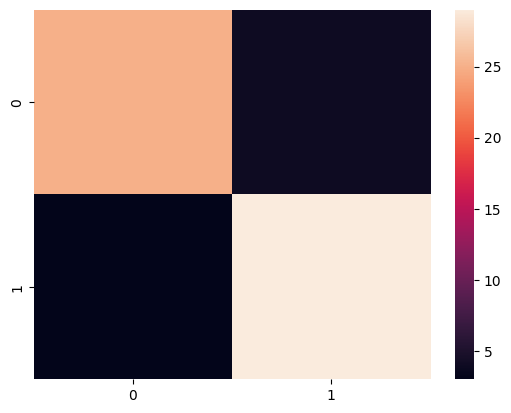

In [27]:
sns.heatmap(c)

KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [35]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
knn.score(x_test, y_test)

0.9016393442622951

In [40]:
df.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [39]:
data = [[29,1,0,120,190,0,1,130,1,1.3,0,0,0]]
knn.predict(data)

array([1])